In [142]:
import pandas as pd
import matplotlib.pyplot as plt

state_abbr = pd.read_csv('state-abbrevs.csv')
state_area = pd.read_csv('state-areas.csv')
state_pop = pd.read_csv('state-population.csv')

pd.set_option('display.max_rows', None)

#Add Puerto Rico to state abbreviations
state_abbr.loc[len(state_abbr.index)] = ['Puerto Rico', 'PR'] 

#rename column
state_pop = state_pop.rename(columns={'state/region': 'abbreviation'})

#Remove USA rows, remove under 18 rows, and remove years that are before 2000
state_pop = state_pop.drop(state_pop[state_pop.abbreviation == 'USA'].index)
state_pop = state_pop.drop(state_pop[state_pop.ages != 'total'].index)
state_pop = state_pop.drop(state_pop[state_pop.year < 2000].index)

#Get abbreviations to insert column later
abbreviation = ((state_pop['abbreviation'].drop_duplicates()).dropna()).reset_index(drop = True)

#Get mean of state populations
state_pop = round(state_pop.groupby('abbreviation').mean(),0)

#Reset index
state_pop.reset_index(inplace = True, drop = True)

#when getting mean, index becomes abbreviation, in order to fix this, reset index and add column of abbreviations
state_pop.insert(0, 'abbreviation', abbreviation)

#Remove unnecessary column before merge
del state_pop['year']

#Merge dataframes
density_df = pd.merge(state_abbr, state_area, how='right', on='state')
density_df = pd.merge(density_df, state_pop, how='right', on='abbreviation')

#Add column for density
density_state = []

for ind in state_abbr.index:
    density_state.append(round(density_df['population'][ind]/density_df['area (sq. mi)'][ind],2))

density_df['density'] = density_state

#Sort by density
density_df.sort_values(by=['density'], axis=0,inplace=True)
density_df.reset_index(inplace = True, drop = True)
print(density_df)


     abbreviation   ages  year  population
1              AL  total  2012   4817528.0
3              AL  total  2010   4785570.0
5              AL  total  2011   4801627.0
6              AL  total  2009   4757938.0
9              AL  total  2013   4833722.0
10             AL  total  2007   4672840.0
12             AL  total  2008   4718206.0
14             AL  total  2005   4569805.0
16             AL  total  2006   4628981.0
18             AL  total  2004   4530729.0
20             AL  total  2003   4503491.0
22             AL  total  2001   4467634.0
24             AL  total  2002   4480089.0
28             AL  total  2000   4452173.0
68             AK  total  2000    627963.0
70             AK  total  2001    633714.0
72             AK  total  2002    642337.0
74             AK  total  2003    648414.0
76             AK  total  2004    659286.0
78             AK  total  2005    666946.0
80             AK  total  2006    675302.0
82             AK  total  2007    680300.0
84         

   abbreviation   density
51           DC  12646.34
50           RI   2436.03
49           CT    635.16
48           MD    454.23
47           IN    348.19
46           DE    301.41
45           UT    278.34
44           FL    273.59
43           ND    272.35
42           PA    272.16
  abbreviation  density
0           NV     5.98
1           MT     6.51
2           AK     7.08
3           WA     8.71
4           AL    12.98
5           WY    18.72
6           TN    18.78
7           TX    22.74
8           AZ    24.78
9           IL    25.37


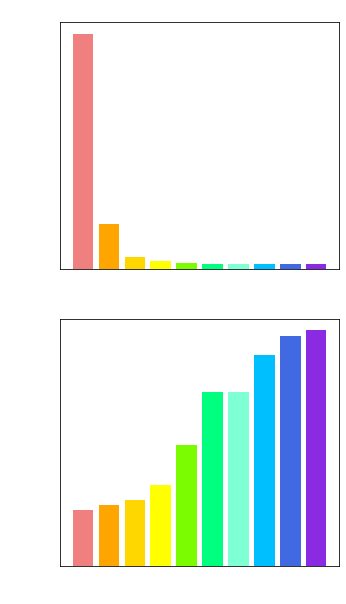

In [145]:
figure, ax = plt.subplots(2, 1)

figure.set_size_inches(5, 10)

top_ten_density = density_df[['abbreviation', 'density']][-1:-11:-1]
print(top_ten_density)

bottom_ten_density = density_df[['abbreviation', 'density']][0:10]
print(bottom_ten_density)

ax[0].bar(top_ten_density['abbreviation'],top_ten_density['density'], color=['lightcoral', 'orange', 'gold', 'yellow', 'lawngreen', 'springgreen', 'aquamarine', 'deepskyblue', 'royalblue', 'blueviolet'])
ax[0].set_title('Highest Density States', color='white')
ax[0].set_xlabel('State', color='white')
ax[0].set_ylabel('Density', color='white')

ax[1].bar(bottom_ten_density['abbreviation'],bottom_ten_density['density'], color=['lightcoral', 'orange', 'gold', 'yellow', 'lawngreen', 'springgreen', 'aquamarine', 'deepskyblue', 'royalblue', 'blueviolet'])
ax[1].set_title('Lowest Density States', color='white')
ax[1].set_xlabel('State', color='white')
ax[1].set_ylabel('Density', color='white')

for row in range(0,2):
    ax[row].tick_params(axis='x', colors='white')
    ax[row].tick_params(axis='y', colors='white')
